In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [53]:
df = pd.read_csv('Customer Churn.csv')
df.tail()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.98,649.782,122.198,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.21,235.089,76.121,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.32,252.288,78.032,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.64,969.876,157.764,0
3149,8,1,11,2,1792,25,7,9,3,1,1,30,100.68,90.612,60.068,1


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  FN                       3150 non-null   float64
 14  FP                      

In [55]:
df.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
FN                         0
FP                         0
Churn                      0
dtype: int64

In [56]:
X = df.drop('Churn', axis = 1)
y = df['Churn']

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3 ,random_state=20,stratify = y )

In [58]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2205, 15) (945, 15) (2205,) (945,)


In [59]:
knn = KNeighborsClassifier(n_neighbors = 6)

In [60]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [61]:
X_new = np.array([[8,1,11,2,1792,25,7,9,3,1,1,30,100,90,20]])

In [62]:
y_pred = knn.predict(X_new)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

In [63]:
# check score model
print(knn.score(X_test,y_test))

0.8518518518518519


In [81]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange (1, 40)
for neighbor in neighbors:
  knn = KNeighborsClassifier(n_neighbors = neighbor)
  knn.fit(X_train,y_train)
  train_accuracies[neighbor] = knn.score(X_train, y_train)
  test_accuracies[neighbor] = knn.score(X_test, y_test)

In [82]:
print(train_accuracies)
print(test_accuracies)

{1: 0.9904761904761905, 2: 0.9260770975056689, 3: 0.9219954648526077, 4: 0.8956916099773242, 5: 0.8947845804988662, 6: 0.8825396825396825, 7: 0.8875283446712018, 8: 0.8825396825396825, 9: 0.8816326530612245, 10: 0.8702947845804989, 11: 0.872562358276644, 12: 0.8689342403628117, 13: 0.8702947845804989, 14: 0.8648526077097506, 15: 0.8675736961451247, 16: 0.8625850340136054, 17: 0.8662131519274376, 18: 0.8612244897959184, 19: 0.8612244897959184, 20: 0.8612244897959184, 21: 0.8616780045351474, 22: 0.8594104308390023, 23: 0.8603174603174604, 24: 0.8571428571428571, 25: 0.8589569160997732, 26: 0.8585034013605443, 27: 0.8566893424036282, 28: 0.8562358276643991, 29: 0.8566893424036282, 30: 0.85578231292517, 31: 0.8571428571428571, 32: 0.8566893424036282, 33: 0.8566893424036282, 34: 0.854421768707483, 35: 0.85578231292517, 36: 0.854875283446712, 37: 0.8553287981859411, 38: 0.8553287981859411, 39: 0.8553287981859411}
{1: 0.8497354497354498, 2: 0.8677248677248677, 3: 0.8486772486772487, 4: 0.8582

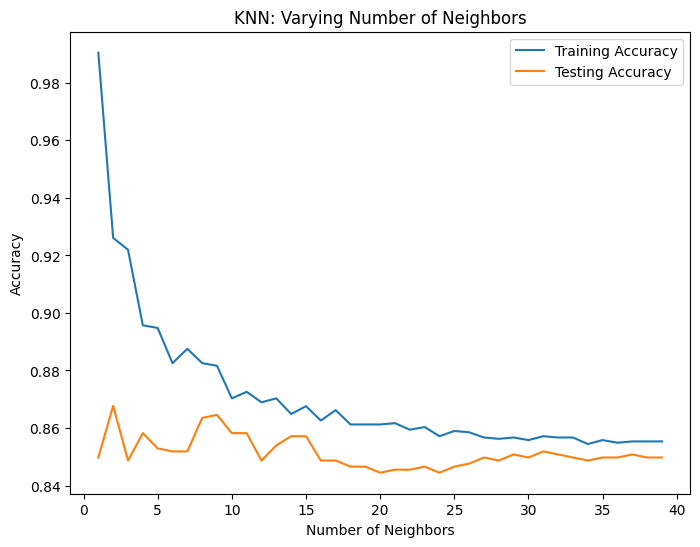

In [83]:
plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()